In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import warnings;warnings.filterwarnings('ignore')

from scipy.stats import zscore

In [ ]:
df = pd.read_csv("/content/Solar Energy.csv")
df

,Data Through Date,Project ID,Interconnection Date,Utility,City/Town,County,Zip,Division,Substation,Circuit ID,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects
0,12/31/2023,SDG-66301,12/29/2023,Con Ed,Richmond Hill,Queens,11418.0,CENY-BK,Brownsville_2,9B05,Kamtech Solar Solutions,NM,6.05,5.17,7100,NaN,1
1,12/31/2023,SDG-66299,12/29/2023,Con Ed,Bronx,Bronx,10473.0,CENY-BX,Parkchester_2,5X67,Kamtech Solar Solutions,NM,6.74,5.76,7911,NaN,1
2,12/31/2023,SDG-66288,12/29/2023,Con Ed,Brooklyn,Kings,11225.0,CENY-BK,Bensonhurst_2,4B08,SUNCO,NM,3.05,2.61,3585,NaN,1
3,12/31/2023,SDG-66284,12/29/2023,Con Ed,Brooklyn,Kings,11236.0,CENY-BK,Bensonhurst_2,3037,Kamtech Solar Solutions,NM,5.62,4.80,6592,NaN,1
4,12/31/2023,SDG-66277,12/28/2023,Con Ed,Springfield Gardens,Queens,11413.0,CENY-Q,Jamaica,9112,Kamtech Solar Solutions,NM,6.05,5.17,7100,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218110,12/31/2023,49.0,12/19/2002,RGE,Ontario,Wayne,14519.0,Sodus,0205LS0237-1589 RTE 104,0205LS0237,NaN,NM,2.81,2.40,3296,NaN,1
218111,12/31/2023,48.0,9/24/2002,RGE,Friendship,Allegany,14739.0,Fillmore,8333GV7702-Friendship Nile RD,8333GV7702,NaN,NM,2.93,2.50,3433,NaN,1
218112,12/31/2023,NaN,07-01-2018,PSEGLI,NaN,Suffolk,11786.0,NaN,NaN,NaN,NaN,FIT,34362.00,24900.00,40335490,NaN,1
218113,12/31/2023,NaN,03-03-2018,PSEGLI,NaN,Suffolk,11933.0,NaN,NaN,NaN,NaN,FIT,27600.00,20000.00,32397984,NaN,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218115 entries, 0 to 218114
Data columns (total 17 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Data Through Date                            218115 non-null  object 
 1   Project ID                                   218112 non-null  object 
 2   Interconnection Date                         218115 non-null  object 
 3   Utility                                      218115 non-null  object 
 4   City/Town                                    218057 non-null  object 
 5   County                                       218115 non-null  object 
 6   Zip                                          218019 non-null  float64
 7   Division                                     132881 non-null  object 
 8   Substation                                   138171 non-null  object 
 9   Circuit ID                                   218085 non-nul

In [ ]:
df.shape

(218115, 17)

In [ ]:
df.isnull().sum()

,0
Data Through Date,0
Project ID,3
Interconnection Date,0
Utility,0
City/Town,58
County,0
Zip,96
Division,85234
Substation,79944
Circuit ID,30


In [ ]:
df.describe()

,Zip,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects
count,218019.000000,218115.000000,218115.000000,2.181150e+05,4091.000000,218115.0
mean,11751.734473,24.507977,19.065451,2.876828e+04,32.174727,1.0
std,962.129108,291.525394,211.419642,3.422042e+05,296.161116,0.0
min,10001.000000,0.010000,0.010000,1.400000e+01,0.350000,1.0
25%,11220.000000,5.270000,4.500000,6.180000e+03,5.000000,1.0
50%,11717.000000,7.130000,6.090000,8.364000e+03,7.600000,1.0
75%,12018.000000,10.240000,8.750000,1.201700e+04,10.000000,1.0
max,14905.000000,43470.000000,31500.000000,5.102682e+07,5000.000000,1.0


In [ ]:
df.drop(['Data Through Date', 'Project ID' , 'Interconnection Date' , 'Energy Storage System Size (kWac)'], axis=1, inplace=True)

In [ ]:
df

,Utility,City/Town,County,Zip,Division,Substation,Circuit ID,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Number of Projects
0,Con Ed,Richmond Hill,Queens,11418.0,CENY-BK,Brownsville_2,9B05,Kamtech Solar Solutions,NM,6.05,5.17,7100,1
1,Con Ed,Bronx,Bronx,10473.0,CENY-BX,Parkchester_2,5X67,Kamtech Solar Solutions,NM,6.74,5.76,7911,1
2,Con Ed,Brooklyn,Kings,11225.0,CENY-BK,Bensonhurst_2,4B08,SUNCO,NM,3.05,2.61,3585,1
3,Con Ed,Brooklyn,Kings,11236.0,CENY-BK,Bensonhurst_2,3037,Kamtech Solar Solutions,NM,5.62,4.80,6592,1
4,Con Ed,Springfield Gardens,Queens,11413.0,CENY-Q,Jamaica,9112,Kamtech Solar Solutions,NM,6.05,5.17,7100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218110,RGE,Ontario,Wayne,14519.0,Sodus,0205LS0237-1589 RTE 104,0205LS0237,NaN,NM,2.81,2.40,3296,1
218111,RGE,Friendship,Allegany,14739.0,Fillmore,8333GV7702-Friendship Nile RD,8333GV7702,NaN,NM,2.93,2.50,3433,1
218112,PSEGLI,NaN,Suffolk,11786.0,NaN,NaN,NaN,NaN,FIT,34362.00,24900.00,40335490,1
218113,PSEGLI,NaN,Suffolk,11933.0,NaN,NaN,NaN,NaN,FIT,27600.00,20000.00,32397984,1


In [ ]:
label_encoder = LabelEncoder()

# Encode object columns
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].astype(str)  # Convert all values to strings
    df[column] = label_encoder.fit_transform(df[column])

df.head()

,Utility,City/Town,County,Zip,Division,Substation,Circuit ID,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Number of Projects
0,1,2214,40,11418.0,80,725,5873,1160,2,6.05,5.17,7100,1
1,1,315,2,10473.0,81,2025,4597,1160,2,6.74,5.76,7911,1
2,1,318,23,11225.0,80,718,3993,1827,2,3.05,2.61,3585,1
3,1,318,23,11236.0,80,718,1577,1160,2,5.62,4.80,6592,1
4,1,2538,40,11413.0,83,948,5783,1160,2,6.05,5.17,7100,1


In [ ]:
df['Zip'].fillna(df['Zip'].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

,0
Utility,0
City/Town,0
County,0
Zip,0
Division,0
Substation,0
Circuit ID,0
Developer,0
Metering Method,0
Estimated PV System Size (kWdc),0


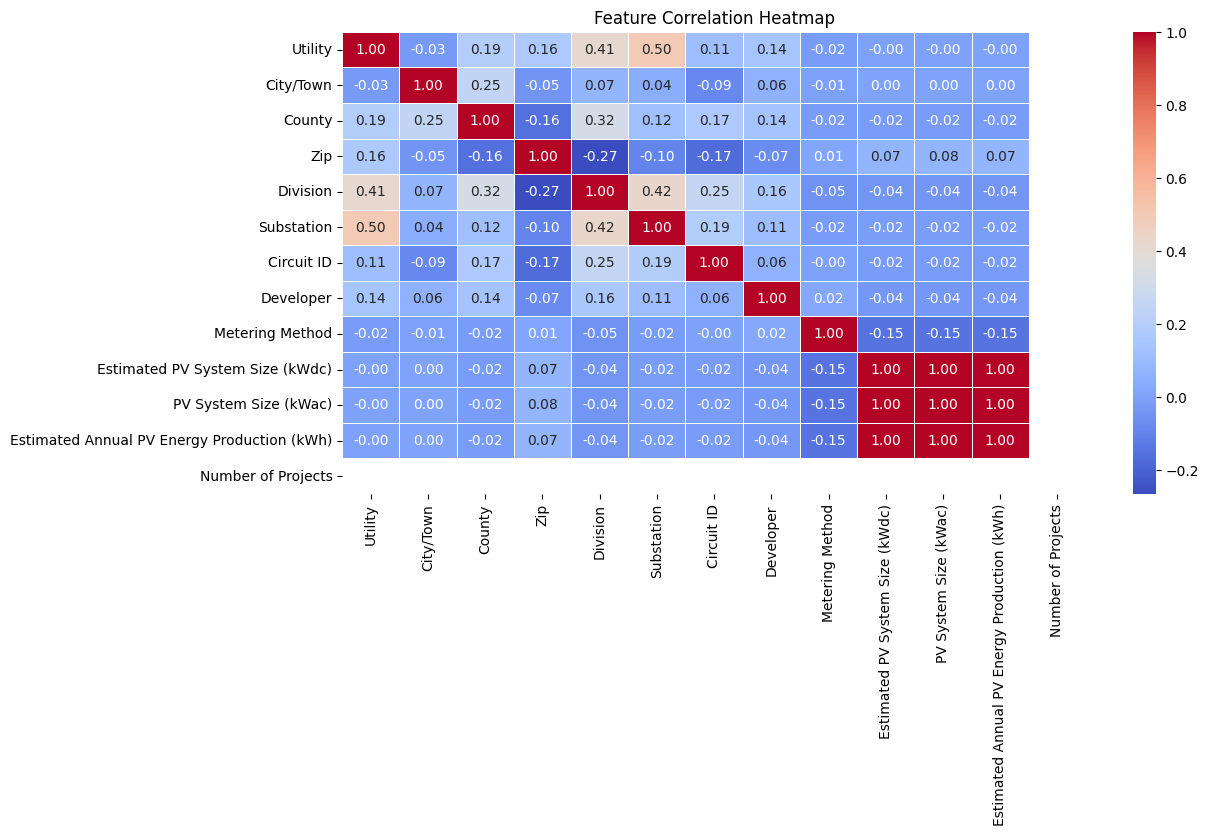

In [ ]:
#check correlation numerical features
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


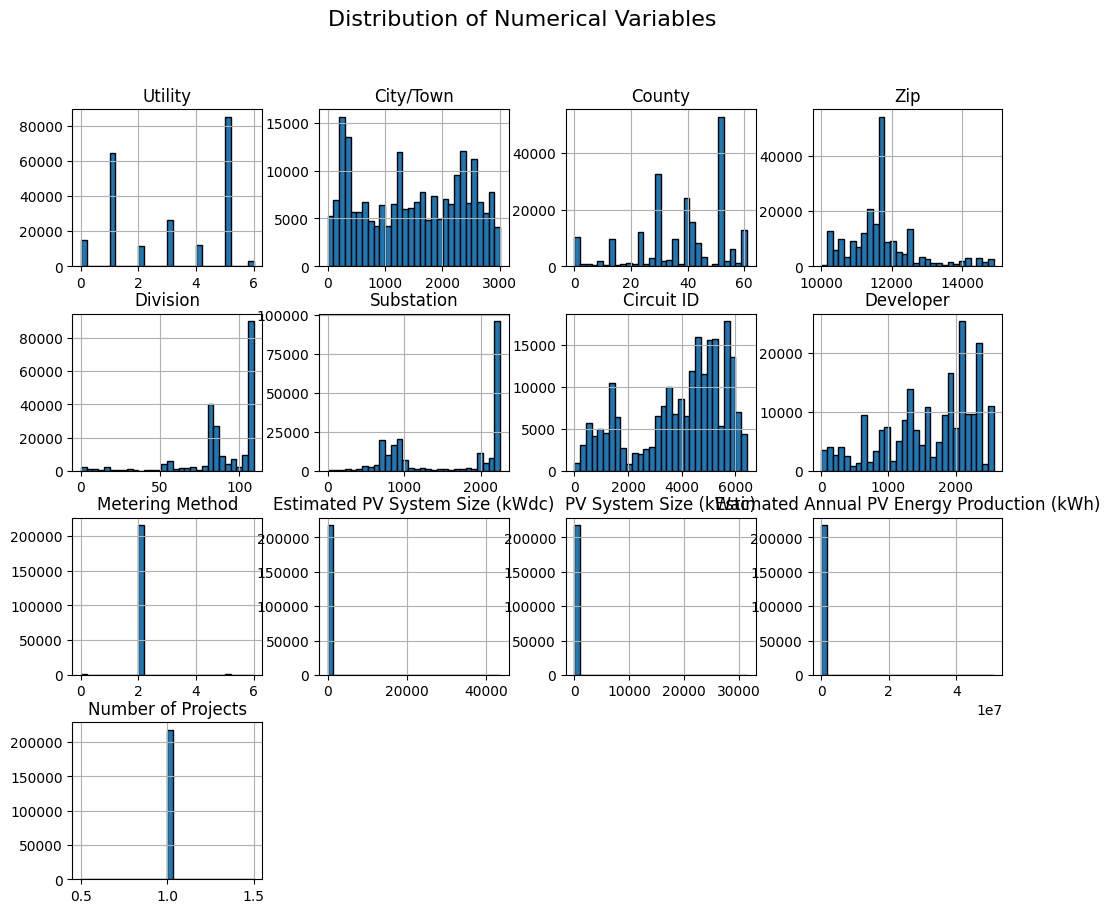

In [ ]:
# Histogram for numerical variables
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.suptitle("Distribution of Numerical Variables", fontsize=16)
plt.show()

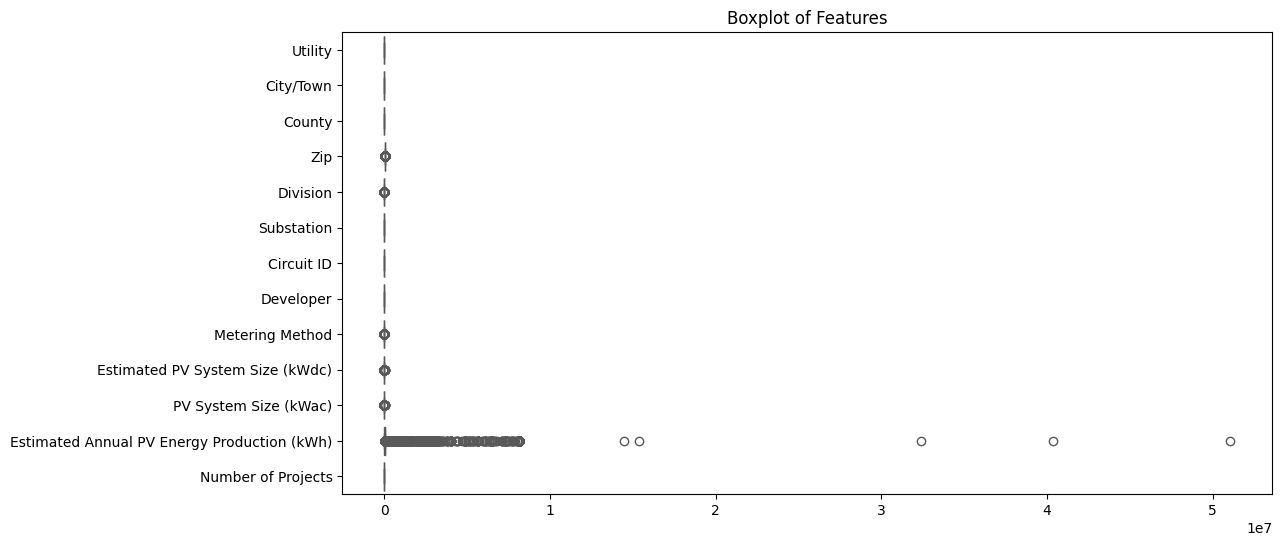

In [ ]:
# Boxplot to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Boxplot of Features")
plt.show()

In [ ]:
#categorical varaible analysis
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette="coolwarm")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
#detect outliers by using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check if any outliers exist
outliers = ((df < lower_bound) | (df > upper_bound)).sum()
print("Number of Outliers in Each Column:\n", outliers)


Number of Outliers in Each Column:
 Utility                                            0
City/Town                                          0
County                                             0
Zip                                            17003
Division                                        9350
Substation                                         0
Circuit ID                                         0
Developer                                          0
Metering Method                                 2923
Estimated PV System Size (kWdc)                12837
PV System Size (kWac)                          12837
Estimated Annual PV Energy Production (kWh)    12837
Number of Projects                                 0
dtype: int64


In [ ]:
df.to_csv("/content/cleaned_dataset.csv", index=False)

In [ ]:
#Data splitting
X = df.drop('Estimated Annual PV Energy Production (kWh)', axis = 1)
y = df['Estimated Annual PV Energy Production (kWh)']

In [ ]:
X_test , X_train , y_test , y_train = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [ ]:
#RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train , y_train)

RandomForestRegressor()

In [ ]:
y_pred = rf_model.predict(X_test)
y_pred

array([ 4120.  , 12745.  ,  6867.  , ...,  1870.69, 24172.  ,  8639.  ])

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get Best Model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred = best_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")